In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("spam.csv")

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df["Category"].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
X=df["Message"]
y=df["Category"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


(4457,)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train_cv=cv.fit_transform(X_train)
X_test_cv=cv.transform(X_test)

X_train_cv.toarray()[2]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
model = MultinomialNB()

model.fit(X_train_cv,y_train)
y_pred = model.predict(X_test_cv)

report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



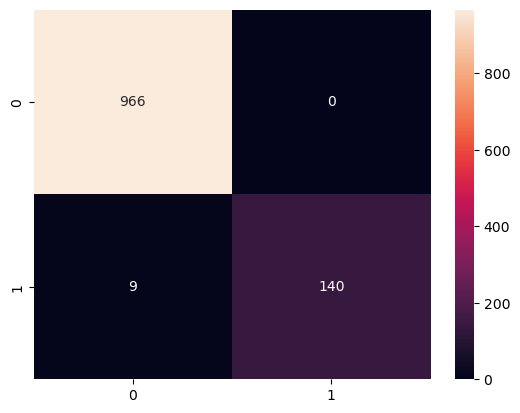

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

cm = confusion_matrix(y_test,y_pred)
sb.heatmap(cm,annot=True,fmt="d")
plt.show()


### Using PipeLine

In [12]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('count_vectorizer',CountVectorizer()),
    ('multinomial_nb',MultinomialNB())
])
pipe.fit(X_train,y_train)
y_pred_pipe=pipe.predict(X_test)

pipe_report = classification_report(y_test,y_pred_pipe)
print(pipe_report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [13]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

pipe.predict(emails)

array(['ham', 'spam'], dtype='<U4')